In [1]:
import numpy as np # linear algebra
import pandas as pd 


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

##setting the max column limit
pd.set_option("max_columns",500)
df = pd.read_csv(r"C:\Users\hp\Desktop\adult.xls")
df.head()



,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.shape


(32561, 15)

In [6]:
df.describe()


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.income.value_counts(normalize=True)


<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64

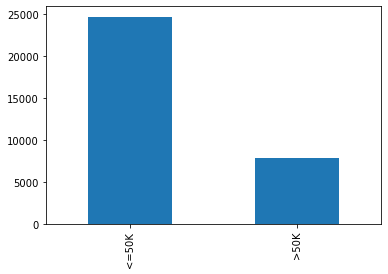

In [8]:
df.income.value_counts().plot(kind='bar')
plt.show()

In [9]:
cat_vars = [x for x in df.columns if df[x].dtype =="object"]
cat_vars

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

In [10]:
num_vars = [x for x in df.columns if x not in cat_vars]
num_vars

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

In [11]:
for i in cat_vars:
    print("-----"+i+"-----")
    print(df[i].value_counts(normalize=True))
    print("\n")

-----workclass-----
Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: workclass, dtype: float64


-----education-----
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: education, dtype: float64


-----marital.status-----
Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Ma

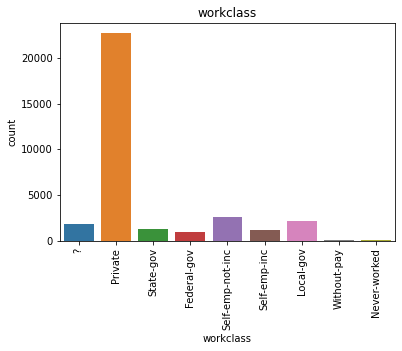

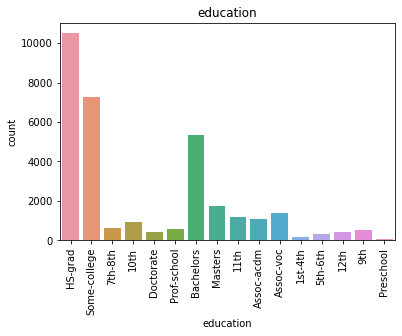

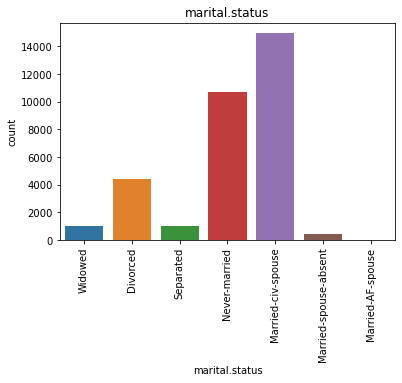

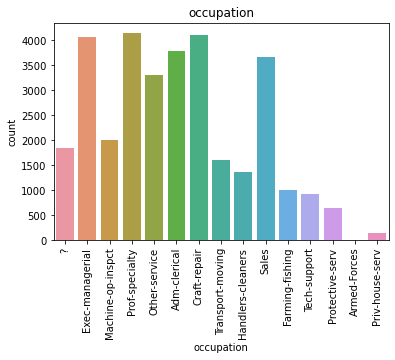

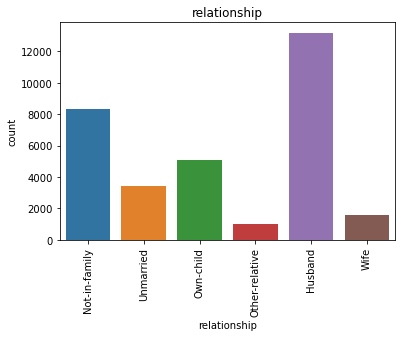

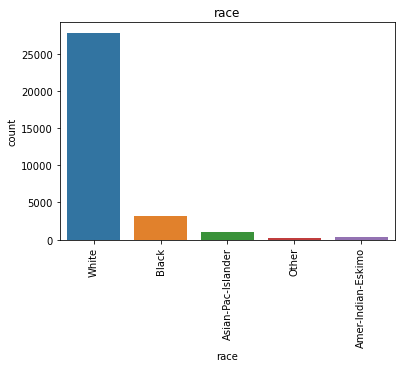

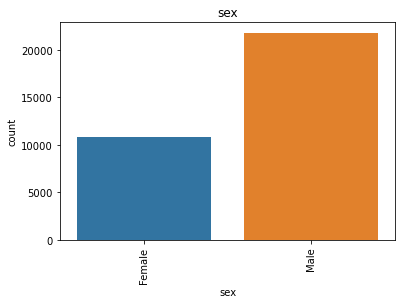

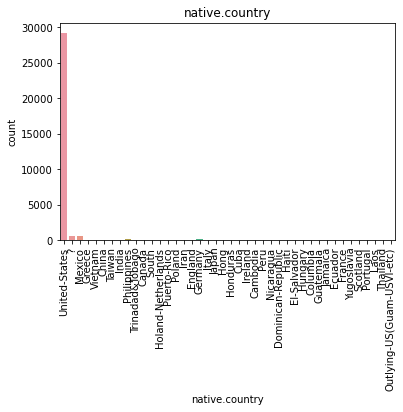

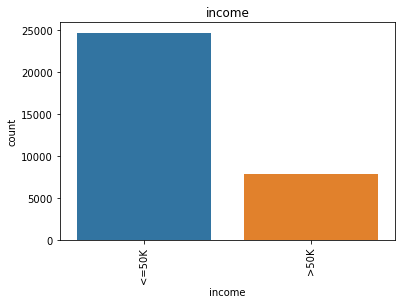

In [12]:
for i in cat_vars:
    plt.title(i)
    sns.countplot(x = df[i])
    
    plt.xticks(rotation=90)
    plt.show()

In [13]:
def assign(x):
    check = ['State-gov','Self-emp-inc','Federal-gov','Without-pay','Never-worked']
    if x in check:
        return "others"
    else:
        return x

df["workclass"] = pd.DataFrame(map(assign,df["workclass"]))

In [14]:
df["workclass"].value_counts(normalize=True)

Private             0.697030
others              0.104266
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
Name: workclass, dtype: float64

In [15]:
def assign(x):
    check = ['10th','7th-8th','Prof-school','9th','12th','Doctorate','5th-6th','1st-4th','Preschool']
    if x in check:
        return "others"
    else:
        return x

df["education"] = pd.DataFrame(map(assign,df["education"]))

In [16]:
df["education"].value_counts(normalize=True)


HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
others          0.124904
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
Name: education, dtype: float64

In [17]:
def assign(x):
    check = ['Widowed', 'Separated', 'Married-spouse-absent', 'Married-AF-spouse']
    if x in check:
        return "others"
    else:
        return x

df["marital.status"] = pd.DataFrame(map(assign,df["marital.status"]))

In [18]:
df["marital.status"].value_counts(normalize=True)


Married-civ-spouse    0.459937
Never-married         0.328092
Divorced              0.136452
others                0.075520
Name: marital.status, dtype: float64

In [19]:
def assign(x):
    check = ['others','Transport-moving','Handlers-cleaners','Farming-fishing','Tech-support','Protective-serv','Priv-house-serv','Armed-Forces']
    if x in check:
        return "others"
    else:
        return x

df["occupation"] = pd.DataFrame(map(assign,df["occupation"]))

In [20]:
df["occupation"].value_counts(normalize=True)


others               0.174933
Prof-specialty       0.127146
Craft-repair         0.125887
Exec-managerial      0.124873
Adm-clerical         0.115783
Sales                0.112097
Other-service        0.101195
Machine-op-inspct    0.061485
?                    0.056601
Name: occupation, dtype: float64

In [21]:
def assign(x):
    check = ['Amer-Indian-Eskimo','Other','Asian-Pac-Islander']
    if x in check:
        return "others"
    else:
        return x

df["race"] = pd.DataFrame(map(assign,df["race"]))
df["race"].value_counts()

White     27816
Black      3124
others     1621
Name: race, dtype: int64

In [22]:
def assign(x):
    check = ['Greece','Vietnam', 'China','Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada','South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran','England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba','Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic','Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala','Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland','Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)','others']
    if x in check:
        return "others"
    else:
        return x

df["native.country"] = pd.DataFrame(map(assign,df["native.country"]))
df['native.country'].value_counts(normalize=True)

United-States    0.895857
others           0.066491
Mexico           0.019748
?                0.017905
Name: native.country, dtype: float64

In [23]:
df["workclass"] = df["workclass"].replace("?","others")
df["occupation"] = df["occupation"].replace("?","others")
df["native.country"] = df["native.country"].replace("?","others")

In [24]:
df['age'].describe([0.25,0.5,0.75,1])


count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
100%        90.000000
max         90.000000
Name: age, dtype: float64

In [25]:
df['fnlwgt'].describe([0.25,0.5,0.75,1])


count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
100%     1.484705e+06
max      1.484705e+06
Name: fnlwgt, dtype: float64

In [26]:
df['education.num'].describe([0.25,0.5,0.75,1])


count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
100%        16.000000
max         16.000000
Name: education.num, dtype: float64

In [27]:
df['capital.gain'].describe([0.25,0.5,0.75,0.8,0.85,0.9,0.95,0.99,1])


count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
80%          0.000000
85%          0.000000
90%          0.000000
95%       5013.000000
99%      15024.000000
100%     99999.000000
max      99999.000000
Name: capital.gain, dtype: float64

In [28]:
df['capital.loss'].describe([0.25,0.5,0.75,0.8,0.85,0.9,0.95,0.99,1])


count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
80%          0.000000
85%          0.000000
90%          0.000000
95%          0.000000
99%       1980.000000
100%      4356.000000
max       4356.000000
Name: capital.loss, dtype: float64

In [29]:
df.drop('capital.loss',1,inplace=True)


In [30]:
wc = pd.get_dummies(df[["workclass"]],drop_first = True)
df = pd.concat([df,wc],axis=1)
### 'education' 
edu = pd.get_dummies(df[["education"]],drop_first = True)
df = pd.concat([df,edu],axis=1)
### 'marital.status'
ms = pd.get_dummies(df[["marital.status"]],drop_first = True)
df = pd.concat([df,ms],axis=1)
### 'occupation'
occu =pd.get_dummies(df[["occupation"]],drop_first = True)
df = pd.concat([df,occu],axis=1) 
### 'relationship'
rel =pd.get_dummies(df[["relationship"]],drop_first = True)
df = pd.concat([df,rel],axis=1)
### 'race'
race = pd.get_dummies(df[["race"]],drop_first = True)
df = pd.concat([df,race],axis=1) 
### 'native.country'
nc = pd.get_dummies(df[["native.country"]],drop_first = True) 
df = pd.concat([df,nc],axis=1)
##checking the head
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,hours.per.week,native.country,income,workclass_Private,workclass_Self-emp-not-inc,workclass_others,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_HS-grad,education_Masters,education_Some-college,education_others,marital.status_Married-civ-spouse,marital.status_Never-married,marital.status_others,occupation_Craft-repair,occupation_Exec-managerial,occupation_Machine-op-inspct,occupation_Other-service,occupation_Prof-specialty,occupation_Sales,occupation_others,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_White,race_others,native.country_United-States,native.country_others
0,90,others,77053,HS-grad,9,others,others,Not-in-family,White,Female,0,40,United-States,<=50K,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0
1,82,Private,132870,HS-grad,9,others,Exec-managerial,Not-in-family,White,Female,0,18,United-States,<=50K,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0
2,66,others,186061,Some-college,10,others,others,Unmarried,Black,Female,0,40,United-States,<=50K,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,54,Private,140359,others,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,40,United-States,<=50K,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0
4,41,Private,264663,Some-college,10,others,Prof-specialty,Own-child,White,Female,0,40,United-States,<=50K,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0


In [31]:
def binary(x):
    if x == "Male":
        return 1
    else:
        return 0
df["sex"] = df["sex"].apply(binary)
###dropping the columns as dummy has been created
df.drop(['workclass','education','marital.status','occupation','relationship','race','native.country'],axis=1,inplace=True)
##Checking the head again
df.head()

,age,fnlwgt,education.num,sex,capital.gain,hours.per.week,income,workclass_Private,workclass_Self-emp-not-inc,workclass_others,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_HS-grad,education_Masters,education_Some-college,education_others,marital.status_Married-civ-spouse,marital.status_Never-married,marital.status_others,occupation_Craft-repair,occupation_Exec-managerial,occupation_Machine-op-inspct,occupation_Other-service,occupation_Prof-specialty,occupation_Sales,occupation_others,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_White,race_others,native.country_United-States,native.country_others
0,90,77053,9,0,0,40,<=50K,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0
1,82,132870,9,0,0,18,<=50K,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0
2,66,186061,10,0,0,40,<=50K,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,54,140359,4,0,0,40,<=50K,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0
4,41,264663,10,0,0,40,<=50K,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0


In [32]:
df["income"] = df["income"].apply(lambda x:1 if x == ">50K" else 0)
df["income"].value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [33]:
X = df.drop("income",axis=1)
X.head()

,age,fnlwgt,education.num,sex,capital.gain,hours.per.week,workclass_Private,workclass_Self-emp-not-inc,workclass_others,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_HS-grad,education_Masters,education_Some-college,education_others,marital.status_Married-civ-spouse,marital.status_Never-married,marital.status_others,occupation_Craft-repair,occupation_Exec-managerial,occupation_Machine-op-inspct,occupation_Other-service,occupation_Prof-specialty,occupation_Sales,occupation_others,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_White,race_others,native.country_United-States,native.country_others
0,90,77053,9,0,0,40,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0
1,82,132870,9,0,0,18,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0
2,66,186061,10,0,0,40,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,54,140359,4,0,0,40,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0
4,41,264663,10,0,0,40,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0


In [34]:
y = df["income"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
###Splitting the data into train-test set
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [36]:
from sklearn.preprocessing import StandardScaler
#instantiate 

scaler = StandardScaler()
##Have to remove 'capital.loss' since we have removed it from our main dataframe
num_vars.remove('capital.loss')
#Fit_Transform
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.head()

,age,fnlwgt,education.num,sex,capital.gain,hours.per.week,workclass_Private,workclass_Self-emp-not-inc,workclass_others,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_HS-grad,education_Masters,education_Some-college,education_others,marital.status_Married-civ-spouse,marital.status_Never-married,marital.status_others,occupation_Craft-repair,occupation_Exec-managerial,occupation_Machine-op-inspct,occupation_Other-service,occupation_Prof-specialty,occupation_Sales,occupation_others,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_White,race_others,native.country_United-States,native.country_others
29313,0.170452,-0.810066,-0.032621,1,-0.146478,0.770137,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
16021,-1.290407,0.127165,-0.032621,1,-0.146478,-0.040732,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0
905,0.462623,-0.484507,-0.032621,1,-0.146478,0.770137,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0
31251,0.608709,-0.660094,1.135803,1,-0.146478,-0.040732,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
3368,-1.144321,-1.487768,-0.032621,1,0.410901,-0.040732,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0


In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
###Training the model 
knn = KNeighborsClassifier(n_neighbors=9) ###k=9
knn = knn.fit(X_train,y_train)

In [38]:
X_test[num_vars] = scaler.transform(X_test[num_vars])
pred = knn.predict(X_test)
##Printing the confusion matrix
print(confusion_matrix(y_test,pred))

[[6777  664]
 [ 939 1389]]


In [39]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      7441
           1       0.68      0.60      0.63      2328

    accuracy                           0.84      9769
   macro avg       0.78      0.75      0.76      9769
weighted avg       0.83      0.84      0.83      9769

